## Problem Statement  

**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a predictive model by applying some data science techniques for the
price of cars with the available independent variables. That should help the
management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to
meet certain price levels

# Import necessary libraries

## Importing Libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [161]:
data = pd.read_csv('auto_imports.csv')
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Domain Analysis

### In this dataset we have 26 columns and 201 rows for Automobile Import Price Prediction
1. **Symboling**:- Represents the insurance risk rating (+3 indicates risky, -3 indicates safe). It could be an important factor in determining the car's price, as it directly correlates with insurance costs.

2. **Normalized-losses**:- This column provides information about the relative average loss payment per insured vehicle year. It might indicate the car's safety and could be correlated with the price.

3. **Make**:-The brand or manufacturer of the automobile. Different brands have different price ranges and popularity, which can significantly impact the price prediction.

4. **Fuel-type**:- Indicates the type of fuel the vehicle uses, which might affect the price due to varying fuel prices and consumer preferences.

5. **Aspiration**- Represents the type of aspiration (e.g., standard or turbocharged) in the car's engine. Turbocharged cars tend to be more expensive due to higher performance.

6. **Num-of-doors**:- The number of doors the car has. This feature might have an impact on price as certain body styles (e.g., coupes vs. sedans) command different prices.

7. **Body-style**:- Defines the body style of the car (e.g., sedan, hatchback, convertible). Different body styles often have different price ranges.

8. **Drive-wheels**:- Indicates the type of wheels (e.g., front-wheel drive, rear-wheel drive, four-wheel drive). This could affect the    car's performance and price.

9. **Engine-location**:- Specifies where the engine is located (e.g., front or rear). This might affect the car's weight distribution and,     subsequently, its price.

10. **Wheel-base, length, width, height, curb-weight**:- These columns provide physical dimensions and weight of the car, which can influence its price.

11. **Engine-type, num-of-cylinders, engine-size**:- Describes the engine specifications. Cars with larger engines or more cylinders might be more expensive due to      higher performance.

12. **Fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm**:- Engine-related features that can affect performance, efficiency, and, subsequently, the price of the car.

13. **City-mpg, highway-mpg**:- Represents the fuel efficiency of the vehicle in city and highway conditions. Higher fuel efficiency might influence the price positively.

14. **Price**:- This is the target variable to be predicted. It's the actual import price of the automobile, which depends on all    the aforementioned features and possibly more

## Basic Checks

In [166]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [168]:
data.tail()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [170]:
data.shape

(200, 26)

In [172]:
data.duplicated().sum()

0

In [174]:
data.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            200 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          200 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         200 non-null    object 
 19  2.68    

### **There are some columns that contains '?'. Which are basically null values. so we need to remove these.**

In [179]:
data = data.replace('?',np.nan)

### **There are few columns which contains numerical data but having object data type. So, we will convert them into numerical data type for better model performance.**

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            164 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          198 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         196 non-null    object 
 19  2.68    

In [184]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Transforming Data

## **- Column names in the above data are converted to a row and then appropriate attributes are given**

In [188]:
data.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [190]:
row=pd.DataFrame([3, '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', 88.60, 168.80, 64.10, 48.80, 2548, 'dohc', 'four',
       130, 'mpfi', 3.47, 2.68, 9.00, 111, 5000, 21, 27,13495])
row=row.transpose()
row

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [192]:
# Change column names
data.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
row.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [194]:
row.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [196]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       198 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [200]:
col = ['normalized_losses','bore', 'stroke','horsepower', 'peak_rpm',]
for i in col:
    data[i] = pd.to_numeric(data[i])

In [202]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,164.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,196.000000,196.000000,200.000000,198.000000,198.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.330000,3.259847,10.170100,103.358586,5118.181818,25.200000,30.705000,13205.690000
std,1.248557,35.442168,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271303,0.317383,4.014163,37.645120,481.666657,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [204]:
data.describe(include='O')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,200,200,200,198,200,200,200,200,200,200
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,113,94,118,197,145,156,91


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       198 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

# Exploratory Data analysis

### Task 1:-Prepare a complete data analysis report on the given data.

In [210]:
## Separating the object and numerical type data
obj_col = data.select_dtypes(include=["object"]).columns.tolist()
num_col = data.select_dtypes(exclude=["object"]).columns.tolist()

In [212]:
obj_col

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

In [214]:
num_col

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

### Univariate Analysis

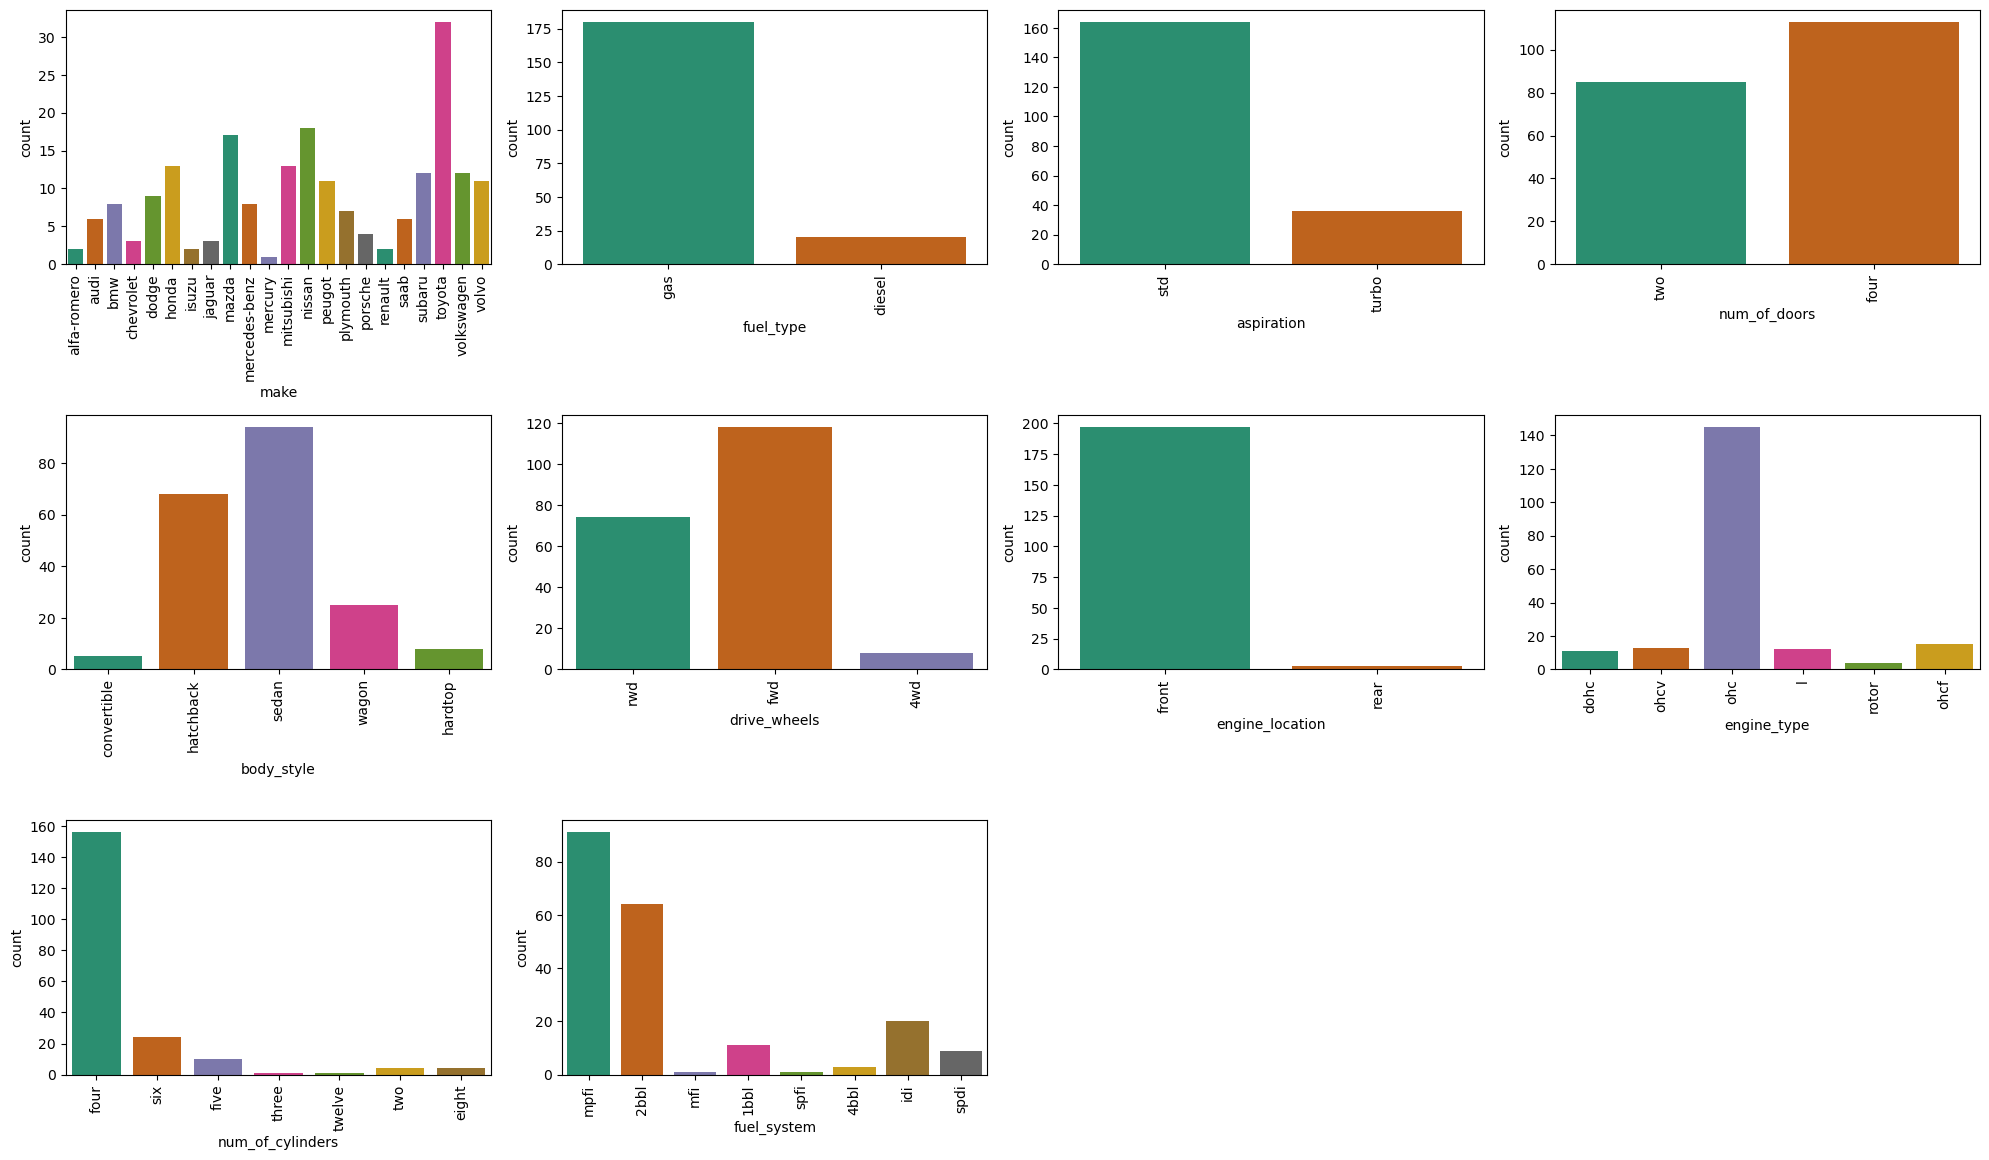

In [ ]:
# Import the Seaborn library's color palette
from seaborn import color_palette



plt.figure(figsize=(20, 15))
plotnum = 1
for i in obj_col:
    plt.subplot(4, 4, plotnum)
    sns.countplot(x=data[i])
    plotnum += 1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [218]:
data['fuel_system'].value_counts()

fuel_system
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

#### **Insights**

1. **Insights of make**- Toyota is the most frequently occuring maker company with 32 occurance among 201 instances followed by nissan with 18 instances, mazda with 17 instances and so on. Mercury is the least frequent among all with only 1 occurance.
    
2. **Insights of fuel-type**- Almost 90% of the cars in our dataset is of gas type, i.e 181 out of 201 instances are of gas type cars whereas there are only 20 instances that shows diesel type car. 
    
3. **Insights of aspiration**- Majority of the car in our dataset have std aspiration while a very few showed having turbo aspiration.
    
4. **Insights of num-of-doors**- There are 113 instances which shows that the car have four doors and rest 
    
5. **Insights of body-style**- sedan is the most frequent occuring body style among all other type of body style in the dataset with 94 instances followed by hatchback , wagon , hardtop and convertible with 68, 25,8 and 6 instances respectively.
    
6. **Insights of drive-wheels**- Almost 60% of the cars have forward-wheel-drive (fwd) while approx 36% have rear-wheel-drive (rwd) and remaining 5% have four-wheel-drive (4wd)
    
7. **Insights of engine-location**- Almost all the cars in this dataset have front engine-location while only 3 have rear engine location.
    
8. **Insights of engine-type**- 'ohc' type of engine is frequently observed on the cars with 145 instances, while rotor is the least used engine type with only 4 instances. Also all other engine types varies between 12-15 instances.
    
7. **Insights of num-of-cylinders**- Clearly most of the cars have four cylinders with frequency measuring 157, whereas 24 cars have six cylinders, 10 cars have five cylinders, two and eight cylinders car are 4 of each, one car have three cylinders and one have twelve. 
      
    
8. **Insights of fuel-system**- 'mpfi' is the most common fuel-system among cars with 92 occurances, followed by '2bbl' with 64 occurance, 'idi' with 20 occurance, '1bbl' with 11 occurances, 'spdi' and '4bbl' with 9 and 3 instances respectively, and 'mfi' and 'spfi' with least instances counting one for each fuel-system.

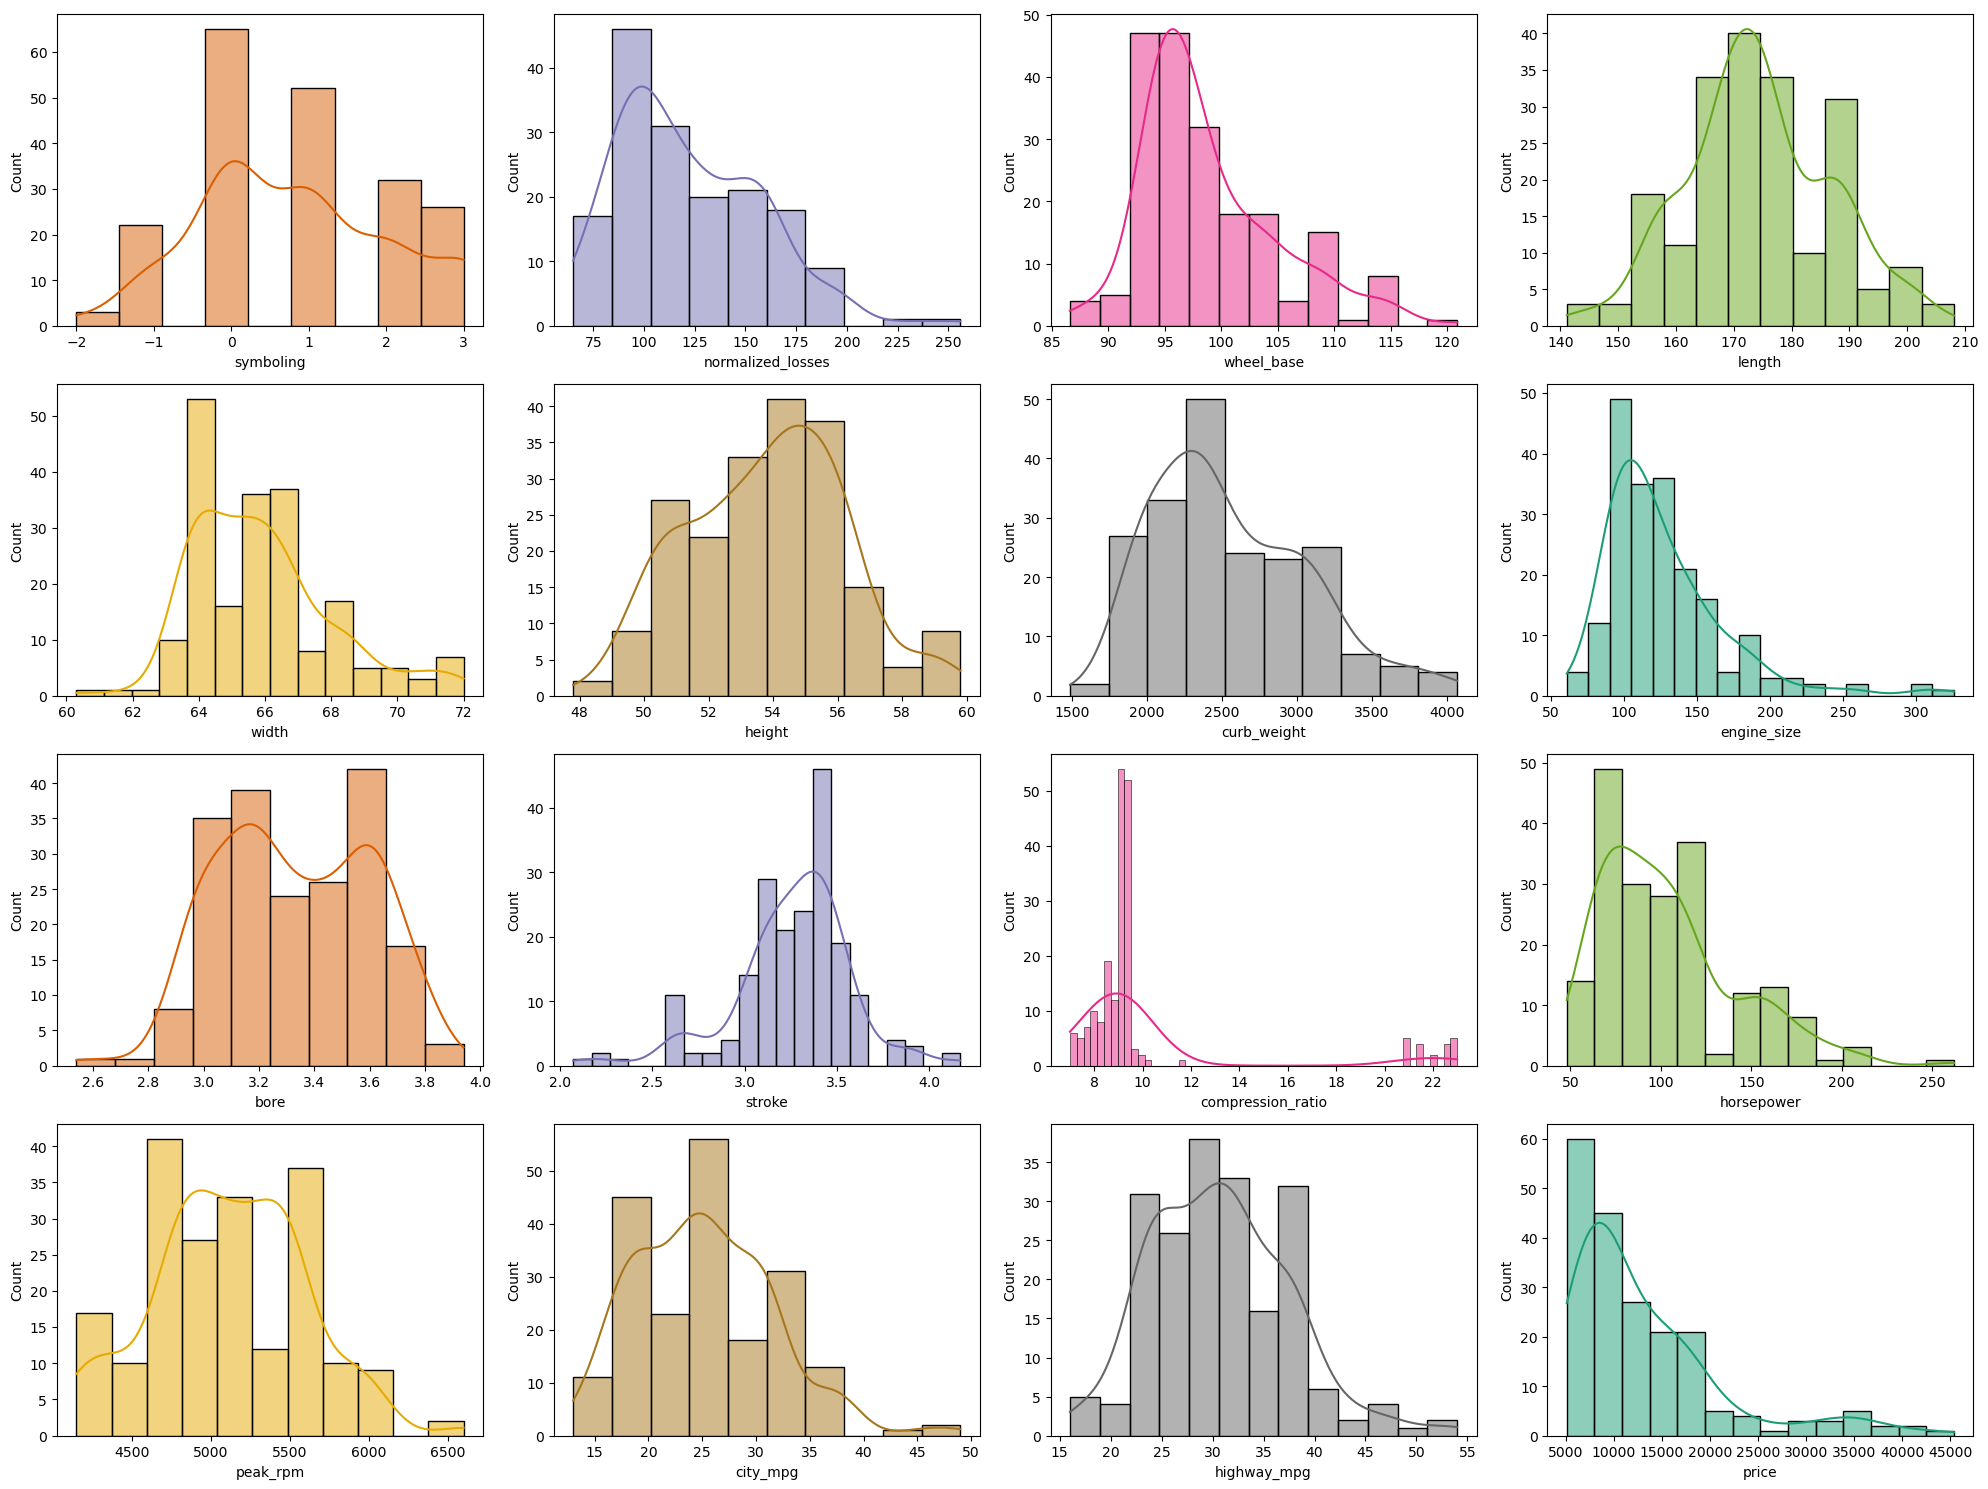

In [ ]:
plt.figure(figsize=(20, 15))
plotnum = 1
for i in num_col:
    plt.subplot(4, 4, plotnum)
    sns.histplot(x=data[i], kde=True)
    plotnum += 1
plt.tight_layout()
plt.show()

#### **Insights**
1. **Skewness:-**
    - Some features, such as engine_size, horsepower, and price, appear to have a right (positive) skew, indicating that most values are concentrated on the lower end.
compression_ratio seems to have extreme outliers.

2. **Bimodal Distributions:-**
    - Some variables, such as bore, peak_rpm, and width, might have bimodal distributions, suggesting the presence of two distinct groups.

3. **Normal Distributions:-**
    - Variables like length and curb_weight look approximately normally distributed, though with some slight skew.

### Bivariate Analysis 

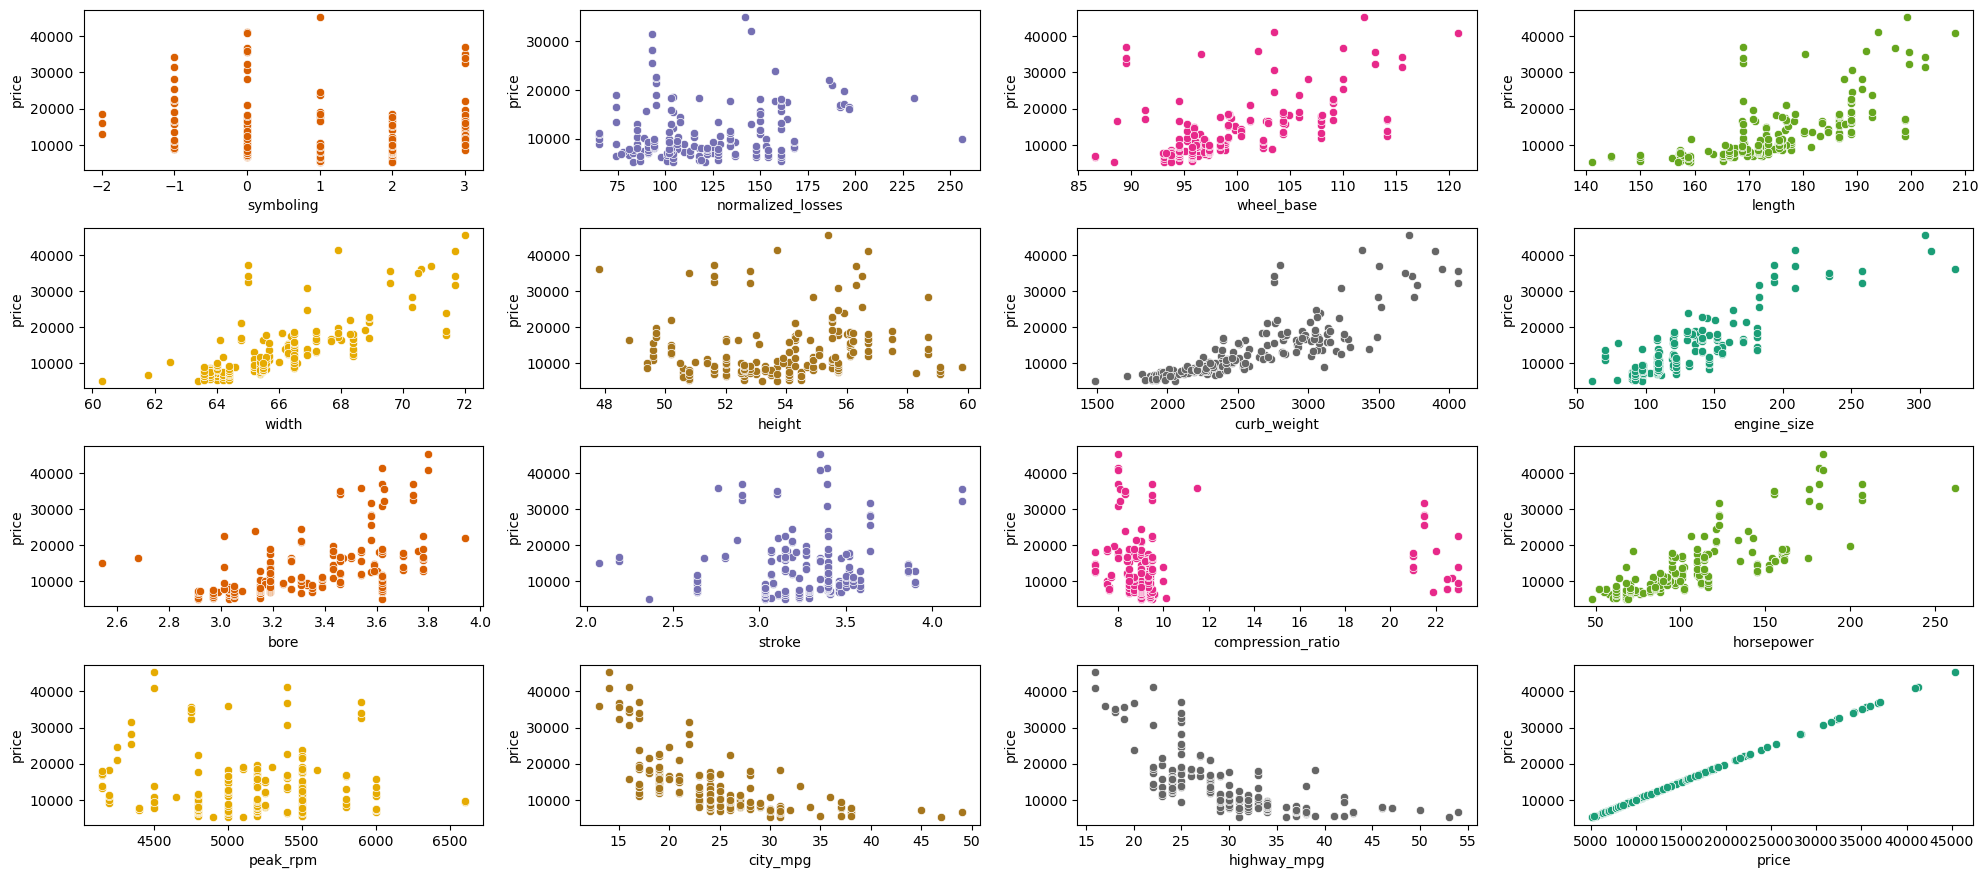

In [ ]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in num_col:
    plt.subplot(7,4,plotnum)
    sns.scatterplot(x=data[i],y=data['price'])
    plotnum+=1
plt.tight_layout()
plt.show()

#### **Insights**
**Positive Correlations with Price**

1. **Length, Width, Curb Weight, Engine Size, Horsepower**
- These variables show a strong positive correlation with price.
- As these values increase, the price also increases.
- This makes sense as larger, more powerful cars tend to be more expensive.

2. **Wheel Base**
  - Shows a moderate positive correlation with price, meaning cars with a longer wheelbase tend to be more expensive.

**Negative Correlations with Price**

1. **City MPG & Highway MPG**
- These show a negative correlation with price.
- High-mileage (fuel-efficient) cars tend to be cheaper, while low-mileage (high-fuel-consuming) cars tend to be expensive.
  
**Weak or No Correlation with Price**

1. **Symboling, Peak RPM, Stroke, Bore, Compression Ratio**
- These variables seem to have weak or inconsistent relationships with price.
- Compression ratio has a few high-value outliers but does not show a clear trend.
 
       

In [227]:
obj_col

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

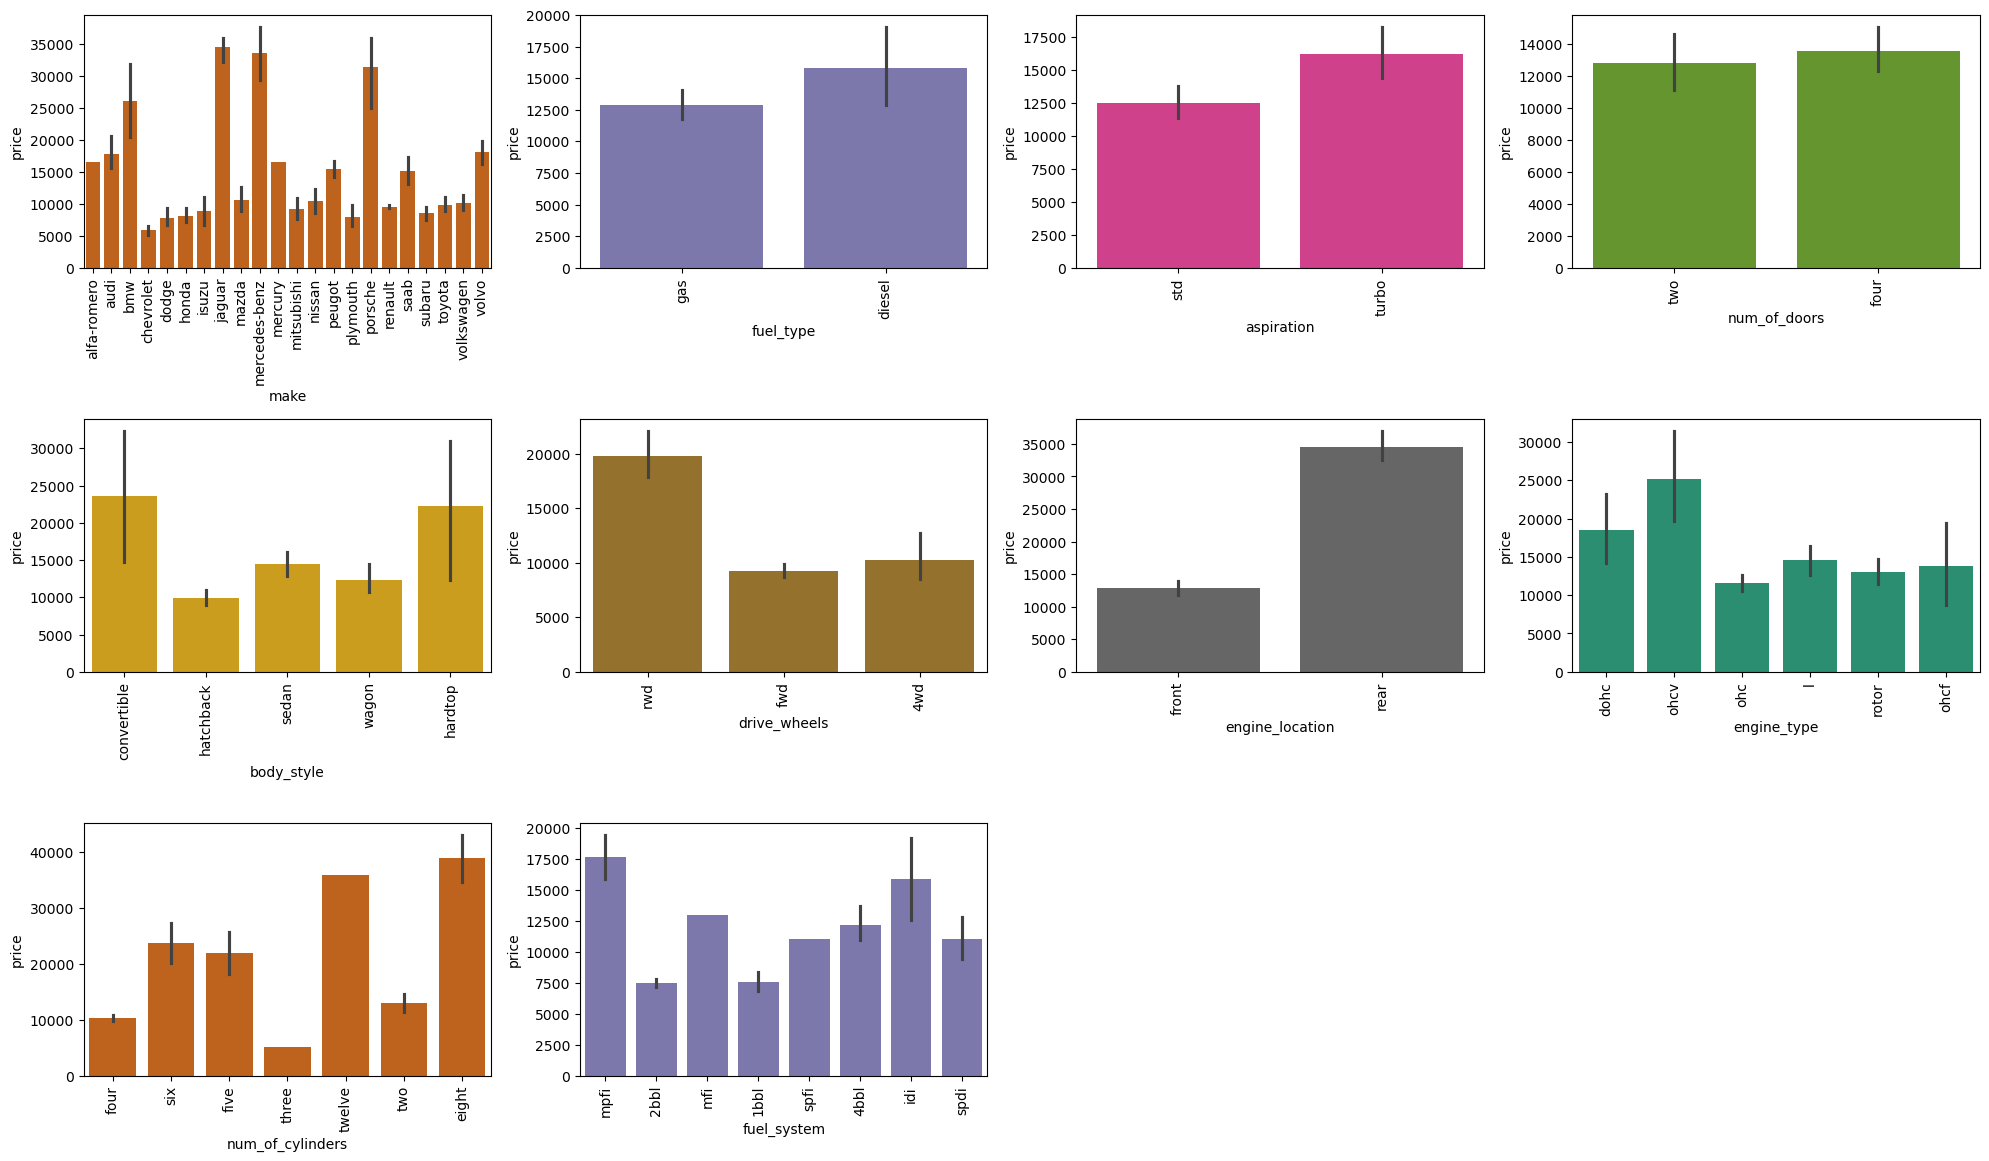

In [ ]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in obj_col:
    plt.subplot(4,4,plotnum)
    sns.barplot(x=data[i],y=data['price'])
    plotnum += 1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Insights**
1. **Fuel Type**
- Diesel cars tend to be slightly more expensive than gasoline cars on average.
- The difference is not huge but noticeable.
  
2. **Aspiration Type**
- Turbocharged cars are generally more expensive than standard aspirated cars.
- This makes sense since turbocharged engines offer better performance.
  
3. **Number of Doors**
- The number of doors (two vs. four) doesn’t show a significant impact on price.
  
4. **Body Style**
- Convertibles and Hardtops are the most expensive.
- Sedans, hatchbacks, and wagons tend to be cheaper.
  
5. **Drive Wheels**
- Rear-wheel drive (rwd) cars are the most expensive.
- Front-wheel drive (fwd) and all-wheel drive (4wd) cars are relatively cheaper.
  
6. **Engine Location**
- Mid-engine cars are significantly more expensive than front-engine cars.
- This aligns with sports and luxury cars often having mid-engine layouts.
  
7. **Engine Type**
- DOHC (Double Overhead Camshaft) engines tend to be the most expensive.
- OHV (Overhead Valve) and OHC (Overhead Camshaft) engines have relatively lower prices.
  
8.**Number of Cylinders**
- Cars with more cylinders (8, 12) are significantly more expensive.
- 3- or 4-cylinder engines are associated with budget-friendly cars.
  
9. **Fuel System**
- Fuel systems like MPFI (Multi-Point Fuel Injection) and IDI (Indirect Injection) appear to have higher-priced cars.
- Carburetor (2bbl) fuel systems are mostly in lower-cost cars.

**Conclusion**
Luxury & performance cars tend to have rear-wheel drive, turbo engines, more cylinders, and mid-engine layouts.
Budget cars mostly have fewer cylinders, front-wheel drive, and simpler fuel systems.


## Data Preprocessing

In [231]:
# Handling Null/Corrupted values
data.isnull().sum()

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [237]:
data.loc[data['normalized_losses'].isnull(),'normalized_losses']=data['normalized_losses'].median()
data.loc[data['bore'].isnull(),'bore']=data['bore'].median()
data.loc[data['stroke'].isnull(),'stroke']=data['stroke'].median()
data.loc[data['horsepower'].isnull(),'horsepower']=data['horsepower'].median()
data.loc[data['peak_rpm'].isnull(),'peak_rpm']=data['peak_rpm'].median()
data.loc[data['num_of_doors'].isnull(),'num_of_doors']='four'

In [239]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [241]:
# Converting Categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [243]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['make'] = lc.fit_transform(data['make'])
data['body_style'] = lc.fit_transform(data['body_style'])
data['engine_type']=lc.fit_transform(data['engine_type'])
data['fuel_system']=lc.fit_transform(data['fuel_system'])

In [255]:
data['fuel_type']=data['fuel_type'].map({'gas':0,'diesel':1})
data['aspiration']=data['aspiration'].map({'std':0,'turbo':1})
data['num_of_doors']=data['num_of_doors'].map({'two':2,'four':4,'':4})
data['engine_location']=data['engine_location'].map({'front':0,'rear':1})
data['num_of_cylinders']=data['num_of_cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [258]:
print(data.columns)


Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [260]:
df = pd.get_dummies(data['drive_wheels'],prefix='drive_wheels',drop_first = True)
data = pd.concat([data,df],axis=1).drop(['drive_wheels'],axis=1)

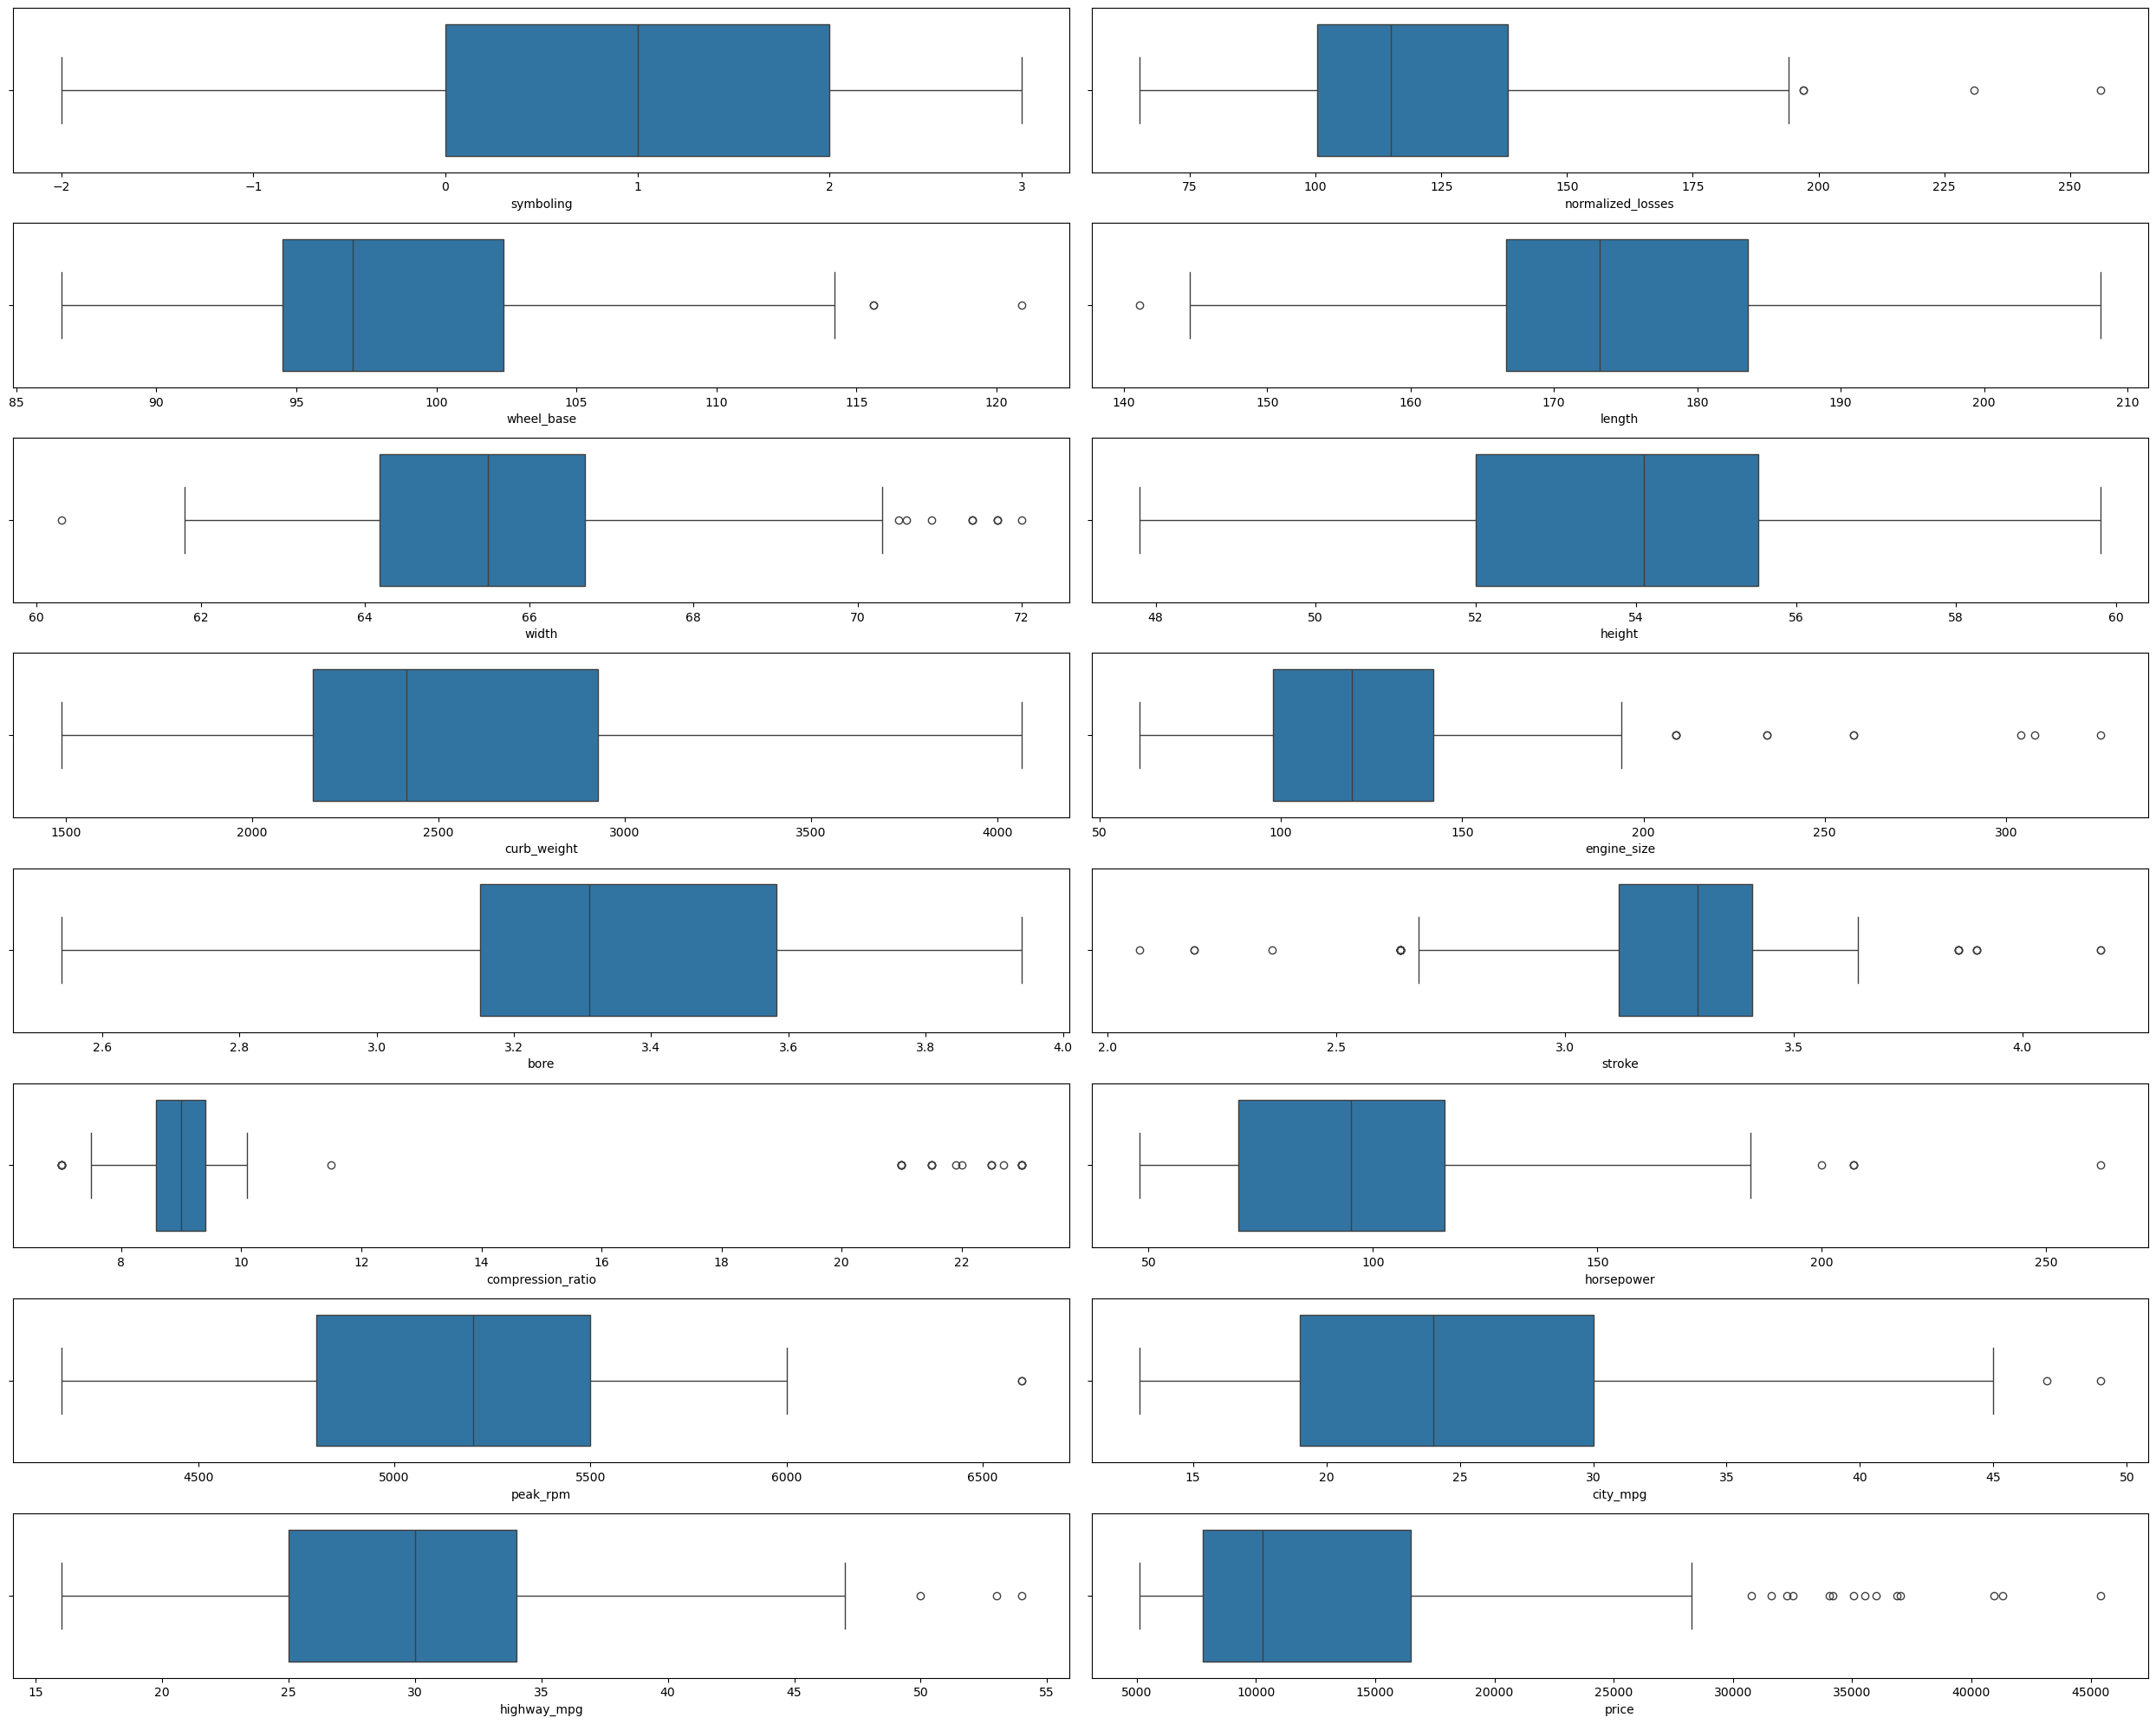

In [262]:
# Handling Outliers
plt.figure(figsize=(25,20))
plotnum = 1
for i in num_col:
    plt.subplot(8,2,plotnum)
    sns.boxplot(x=data[i])
    plotnum += 1
plt.tight_layout()
plt.show()

In [264]:
q1 = 0
q3 = 0
iqr = 0
ul = 0
ll = 0
for i in num_col:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr 
    ul = q3 + 1.5*iqr
    data.loc[data[i]<=ll,i]=data[i].median()
    data.loc[data[i]>=ul,i]=data[i].median()

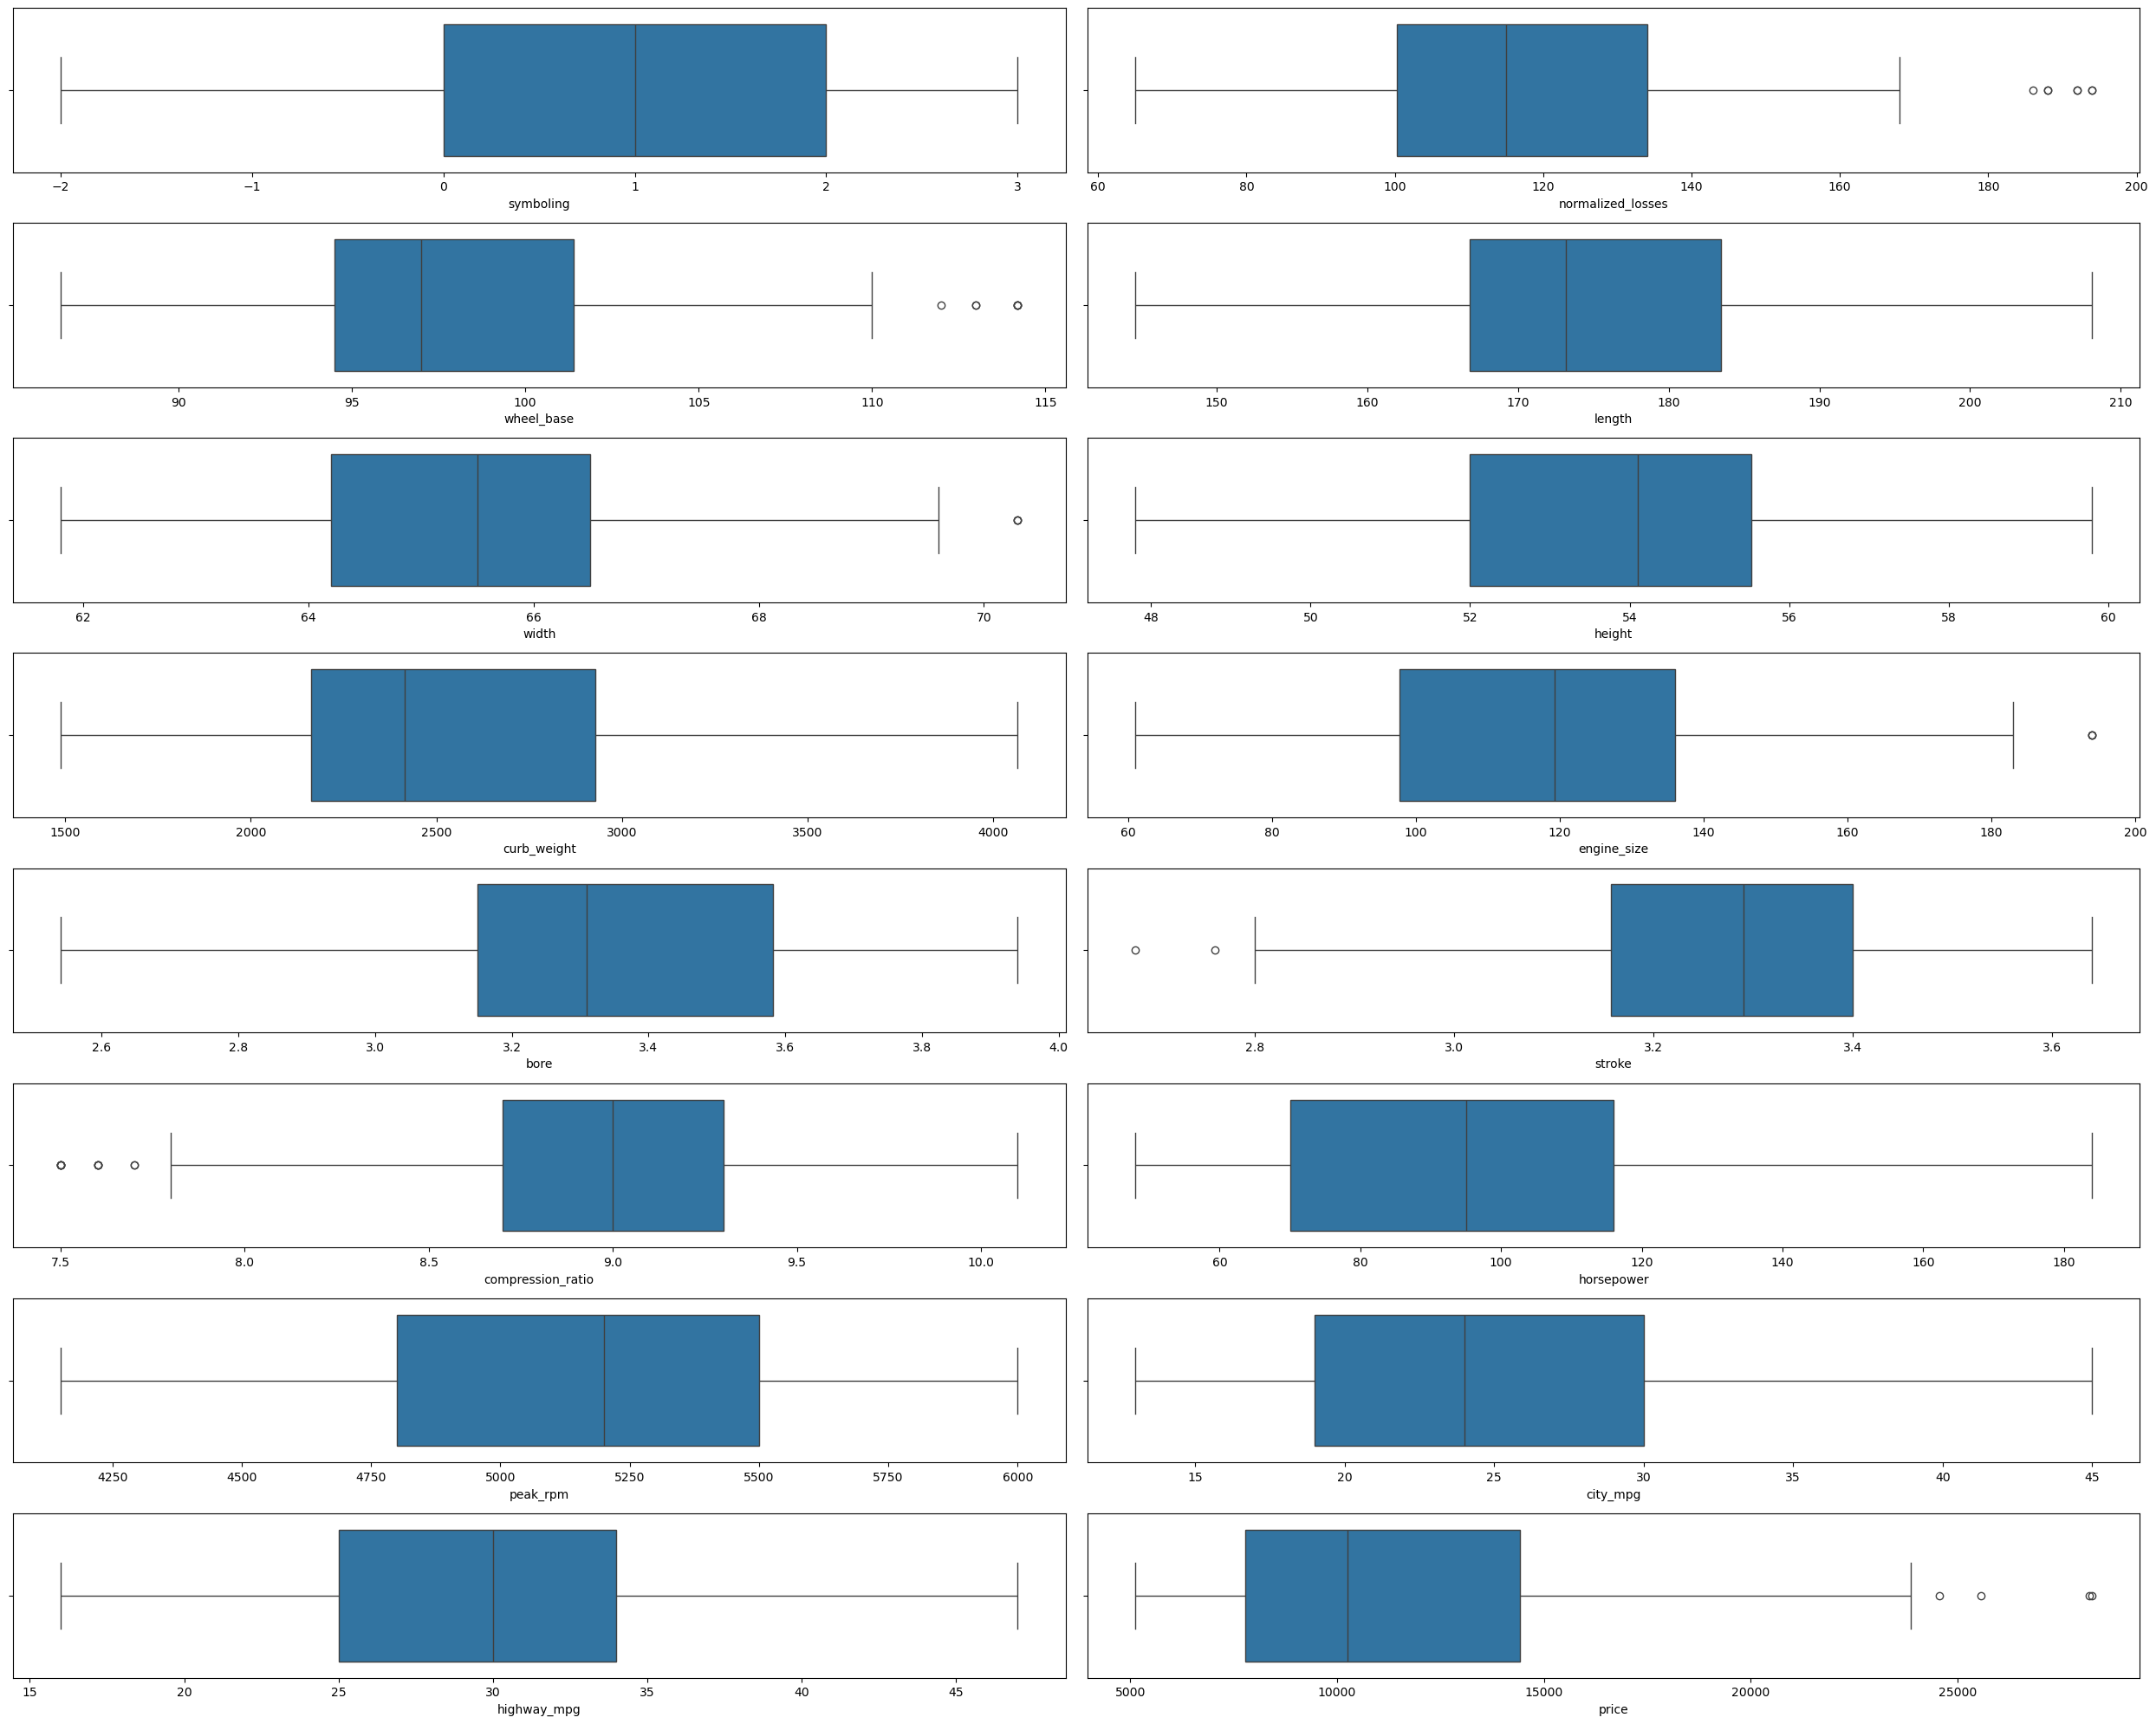

In [266]:
plt.figure(figsize=(25,20))
plotnum = 1
for i in num_col:
    plt.subplot(8,2,plotnum)
    sns.boxplot(x=data[i])
    plotnum += 1
plt.tight_layout()
plt.show()

In [279]:
num_col_scal = ['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [281]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_col_scal] = scaler.fit_transform(data[num_col_scal])

In [283]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,drive_wheels_fwd,drive_wheels_rwd
0,1.0,0.387597,0,0,0,2,0,0,0.072464,0.381102,...,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000,0.354839,16500,False,True
1,0.6,0.387597,0,0,0,2,2,0,0.286232,0.418898,...,0.100000,0.822917,0.576923,0.779412,0.459459,0.18750,0.322581,16500,False,True
2,0.8,0.767442,1,0,0,4,3,0,0.478261,0.503937,...,0.464286,0.750000,0.961538,0.397059,0.729730,0.34375,0.451613,13950,True,False
3,0.8,0.767442,1,0,0,4,3,0,0.463768,0.503937,...,0.464286,0.750000,0.192308,0.492647,0.729730,0.15625,0.193548,17450,False,False
4,0.8,0.387597,1,0,0,2,3,0,0.478261,0.514961,...,0.464286,0.750000,0.384615,0.455882,0.729730,0.18750,0.290323,15250,True,False


## Feature Engineering

In [286]:
# Check for correlation
# This is done on the continuous data and dropping the target column

In [288]:
num_col_scal 

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [290]:
data1 = data[num_col_scal]

<Axes: >

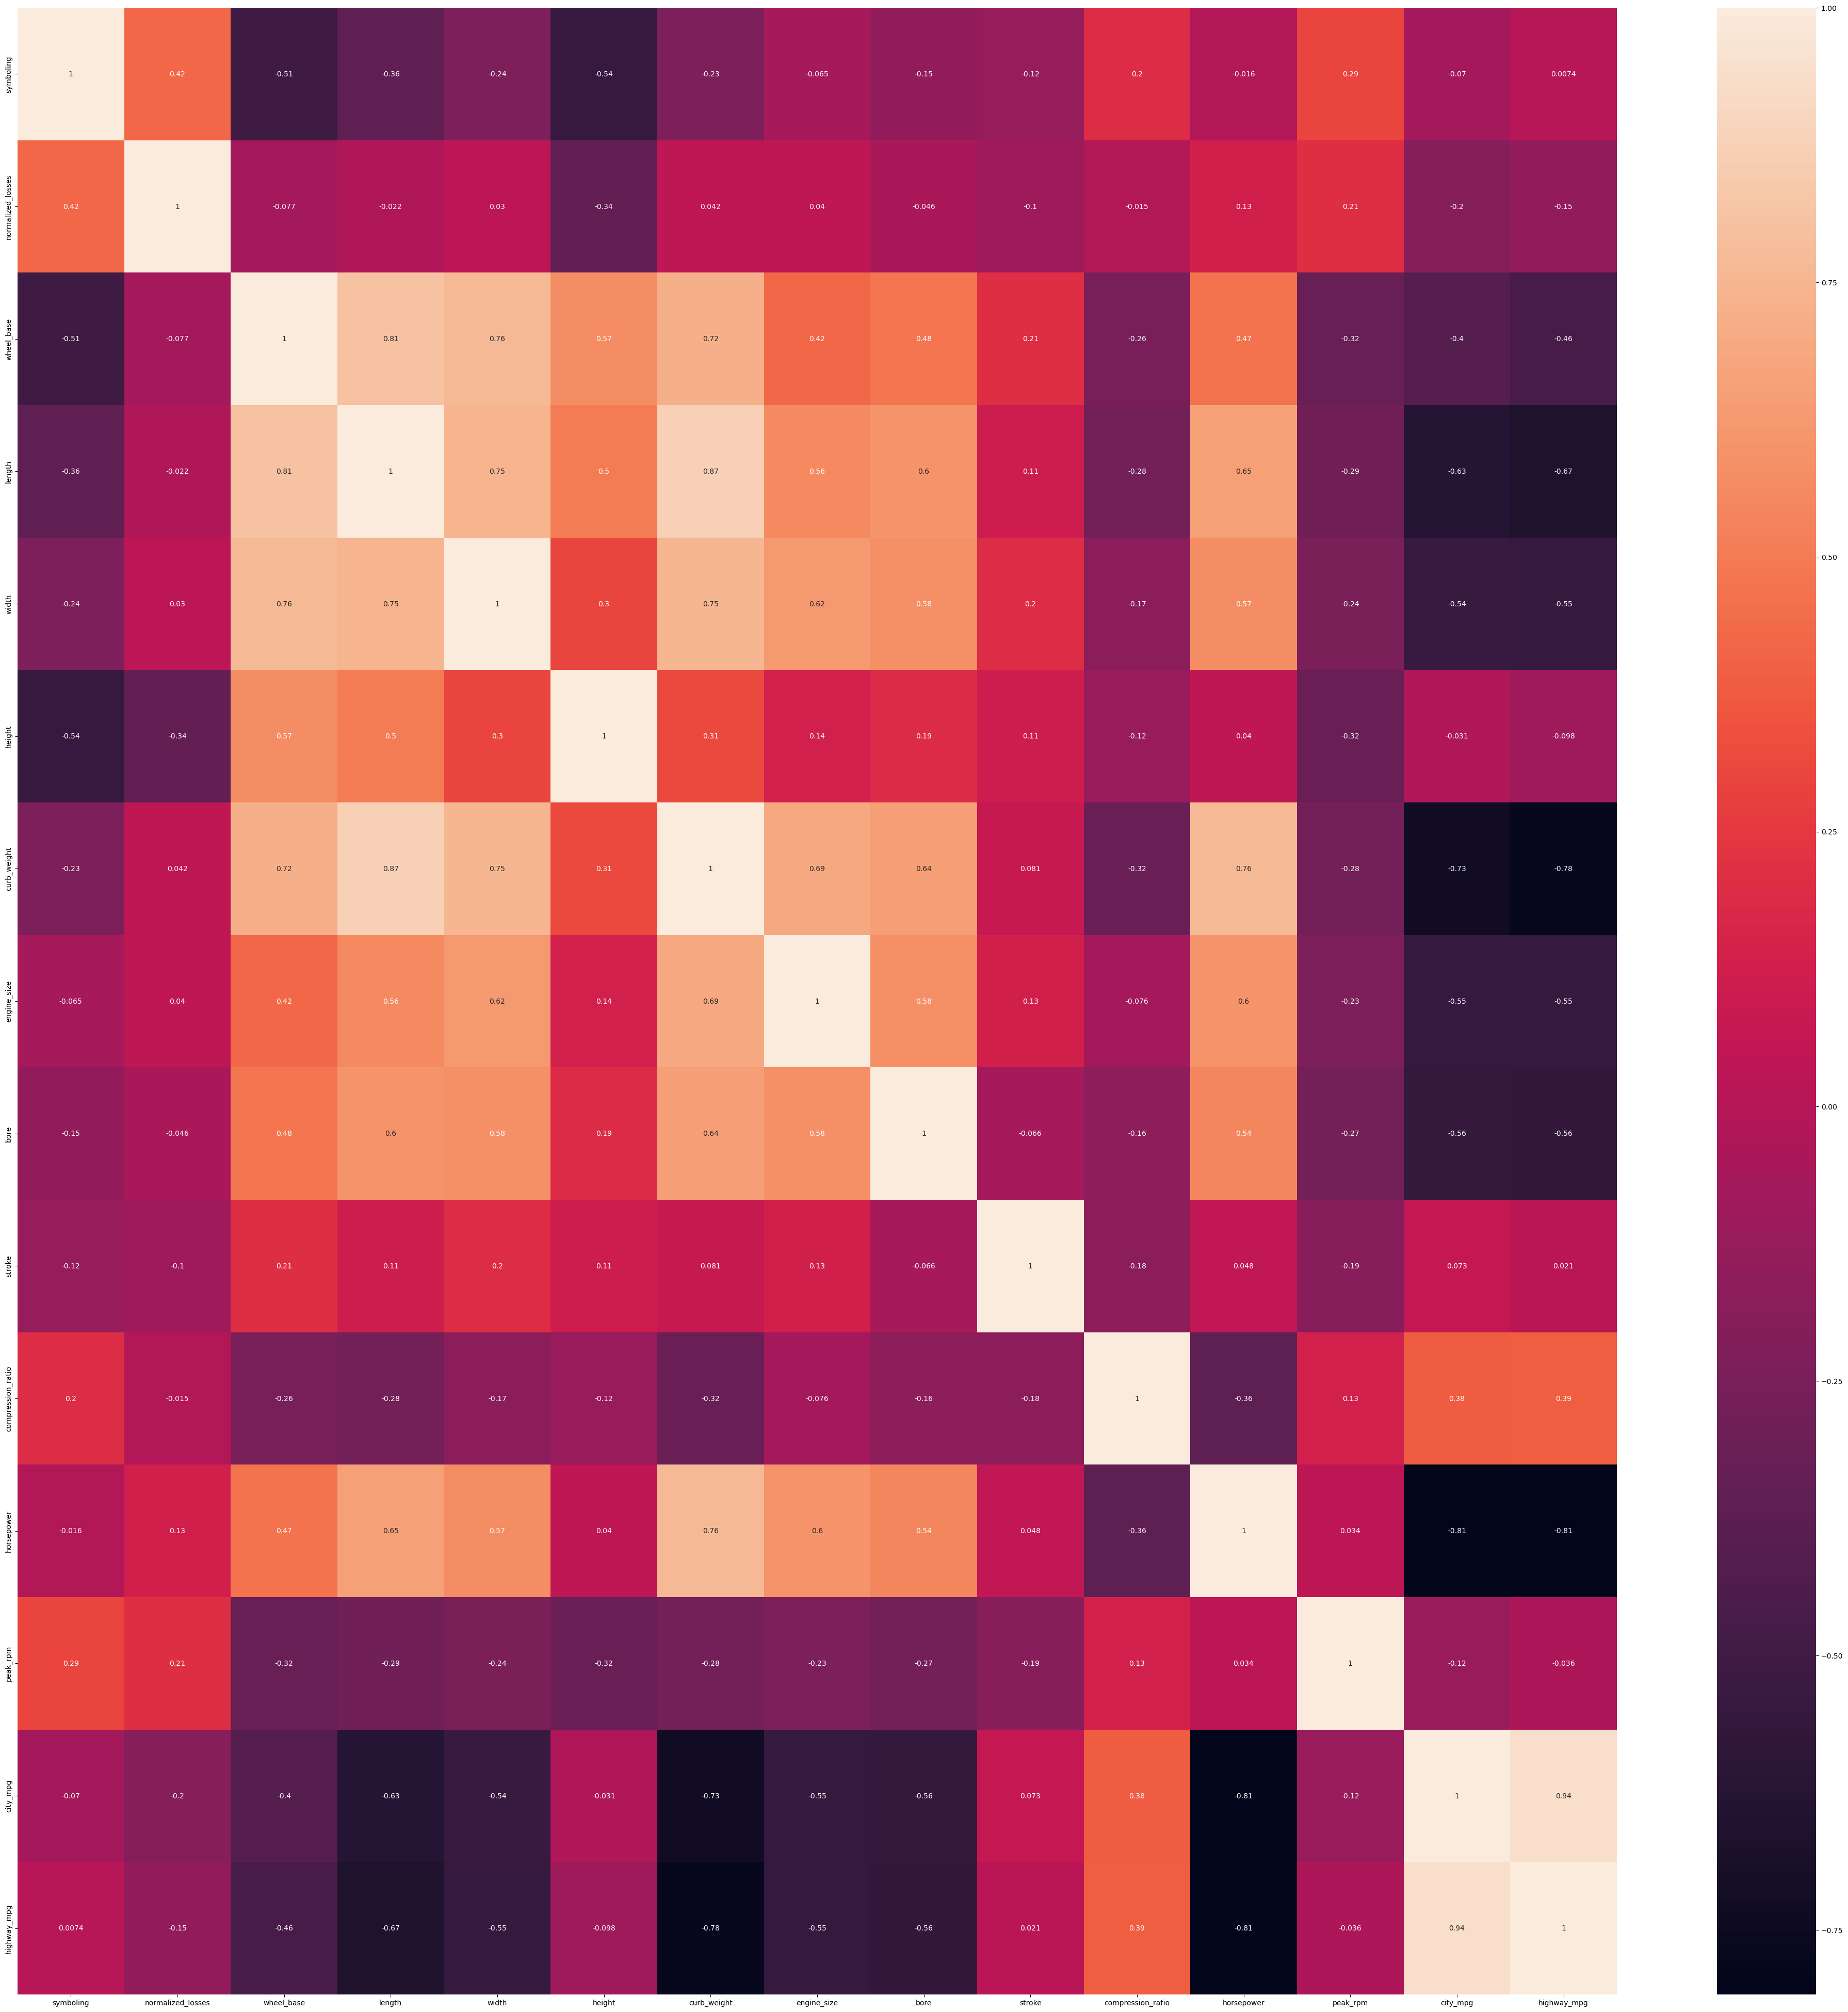

In [292]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.corr(),annot = True)

## Splitting Data

In [296]:
x = data.drop('price',axis=1)
y = data['price']

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

# Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

## Linear Regression

### Model Creation

In [301]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model_LR = LR.fit(x_train,y_train)
model_LR

LinearRegression()

In [305]:
y_pred_LR = model_LR.predict(x_test)

### Model Evaluation

In [308]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluation(a,b):
    MSE = mean_squared_error(a,b)
    MAE = mean_absolute_error(a,b)
    R2  = r2_score(a,b)
    print('MSE :',MSE)
    print('MAE : ',MAE)
    print("R2_Score : ",R2)

In [310]:
evaluation(y_test,y_pred_LR)

MSE : 7481102.926330062
MAE :  1943.5711836240976
R2_Score :  0.7317836405717486


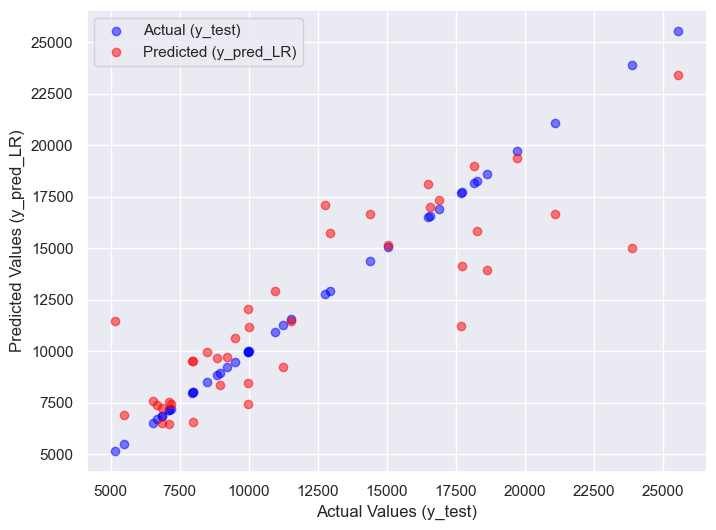

In [312]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_LR,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_LR)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_LR)")
plt.legend()
plt.grid(True)
plt.show()

## KNN

### Model Creation

In [316]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
model_KNN = KNN.fit(x_train,y_train)
model_KNN

KNeighborsRegressor(n_neighbors=3)

In [318]:
y_pred_KNN = model_KNN.predict(x_test)

### Model Evaluation

In [321]:
evaluation(y_test,y_pred_KNN)

MSE : 8530247.230555555
MAE :  2138.3916666666664
R2_Score :  0.6941691780298878


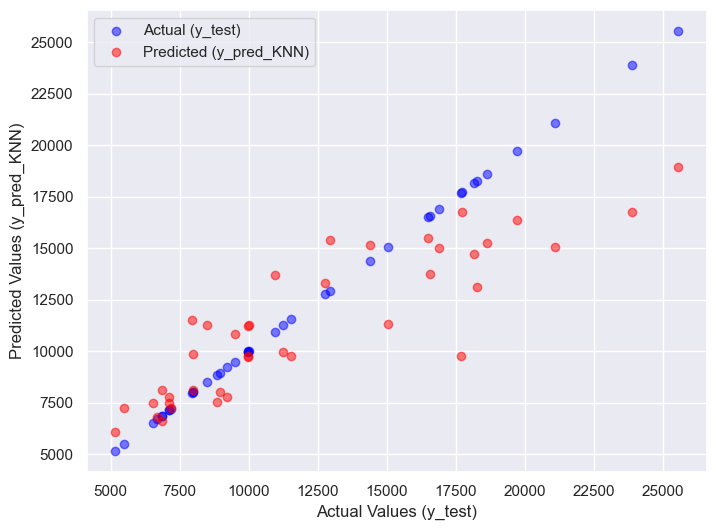

In [323]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_KNN,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_KNN)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_KNN)")
plt.legend()
plt.grid(True)
plt.show()

## SVM

### Model Creation

In [327]:
from sklearn.svm import SVR
svr = SVR()
model_svr = svr.fit(x_train,y_train)
model_svr

SVR()

In [329]:
y_pred_SVR = model_svr.predict(x_test)

### Model Evaluation

In [332]:
evaluation(y_test,y_pred_SVR)

MSE : 31562611.869387127
MAE :  4300.497357431501
R2_Score :  -0.13159903466357337


### Cross Validation

In [335]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(svr,x,y,cv=5,scoring='r2')

print("Cross-validation R2 Scores: ",scores)
print("Mean R2 Score: ",scores.mean())
print("Standard Deviation of R2 Score: ",scores.std())

Cross-validation R2 Scores:  [-0.04177738 -0.08219753 -0.04814495 -0.01678851 -0.62653269]
Mean R2 Score:  -0.1630882106717199
Standard Deviation of R2 Score:  0.23266111188186708


### HyperParameter Tuning for SVM

In [338]:
# We use GridSearch CV
from sklearn.model_selection import GridSearchCV
# Defining Hyperparameter
param_grid = {'C':[0.001,0.01,0.1,1,2,5,6,70,80],'kernel':['linear'],'epsilon':[0.01,0.1,0.2,0.5,1]}
model=SVR()
grid = GridSearchCV(model,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(x,y)
print(grid.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.2, 

[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
{'C': 80, 'epsilon': 0.01, 'kernel': 'linear'}


In [339]:
svr = SVR(kernel='linear',epsilon=0.01,C=80)
svr.fit(x_train,y_train)
y_pred_svr_2 = svr.predict(x_test)

### Model Evaluation

In [343]:
evaluation(y_test,y_pred_svr_2)

MSE : 14229639.915158968
MAE :  2625.10758862802
R2_Score :  0.4898316128513477


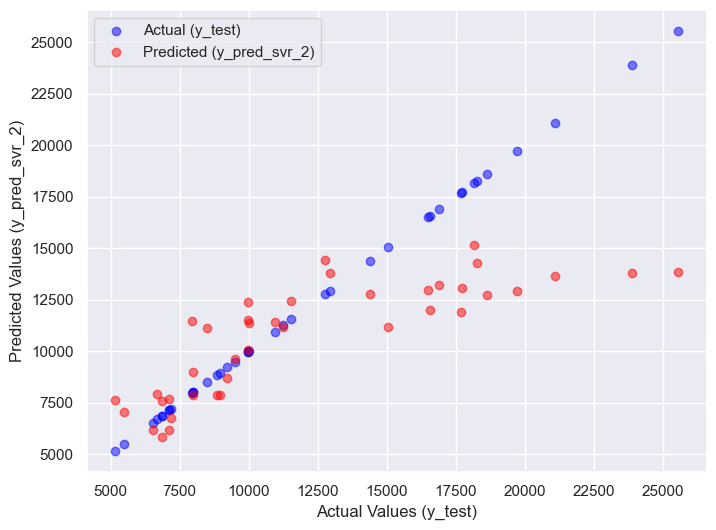

In [345]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_svr_2,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_svr_2)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_svr_2)")
plt.legend()
plt.grid(True)
plt.show()

## Decision tree

### Model Creation

In [349]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
model_dct = dct.fit(x_train,y_train)
model_dct

DecisionTreeRegressor()

In [351]:
y_pred_dct = model_dct.predict(x_test)

### Model Evaluation

In [354]:
evaluation(y_test,y_pred_dct)

MSE : 5792036.275
MAE :  1631.875
R2_Score :  0.792340929050823


### HyperParameter Tuning for Decision Tree

In [357]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor,param_grid,scoring='r2',cv=5)
grid_search.fit(x,y)
best_params = grid_search.best_params_
print("Best HyperParameters: ")
print(best_params)

Best HyperParameters: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [358]:
dt = DecisionTreeRegressor(max_depth= None,max_features='sqrt',min_samples_leaf= 4, min_samples_split=2)
dt.fit(x_train,y_train)
y_pred_dct_2 = dt.predict(x_test)

### Model Evaluation

In [360]:
evaluation(y_test,y_pred_dct_2)

MSE : 7763772.3880137475
MAE :  1961.8666071428572
R2_Score :  0.7216492292849446


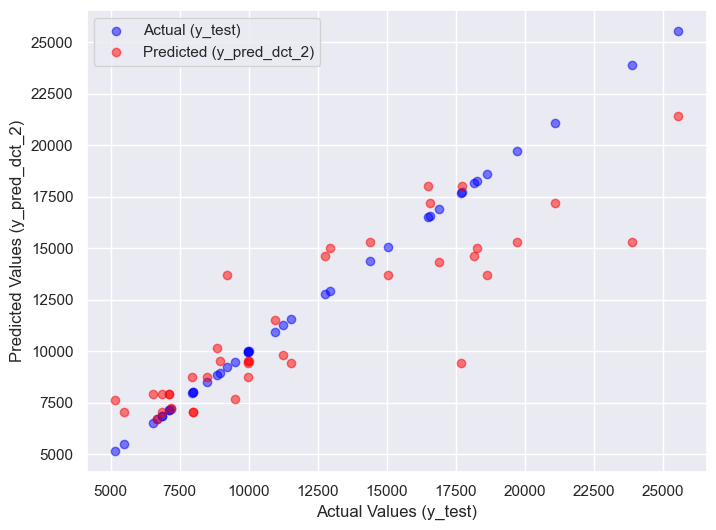

In [361]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_dct_2,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_dct_2)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_dct_2)")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

### Model Creation

In [364]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model_rfr = rfr.fit(x_train,y_train)
model_rfr

RandomForestRegressor()

In [365]:
y_pred_rfr = model_rfr.predict(x_test)

### Model Evaluation

In [367]:
evaluation(y_test,y_pred_rfr)

MSE : 3243868.964814444
MAE :  1159.4831666666664
R2_Score :  0.8836991373100065


### HyperParameter Tuning

In [369]:
#initializie the libraries and parameters 
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [370]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rfr_ht=RandomForestRegressor(random_state=42)
rfr_cv = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, 
                            random_state=42, n_jobs=-1, scoring='r2')
rfr_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [371]:
rf_best_params=rfr_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 46, 'bootstrap': True}


In [372]:
rfr1=RandomForestRegressor(n_estimators=400,max_features='sqrt',max_depth=82,min_samples_split=10,
                           min_samples_leaf=4,random_state=42,bootstrap=True,verbose=2)
rfr1.fit(x_train,y_train)
y_pred_rfr_2=rfr1.predict(x_test)

building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


### Model Evaluation 

In [374]:
evaluation(y_test,y_pred_rfr_2)

MSE : 6385660.547250626
MAE :  1642.2594326382718
R2_Score :  0.7710580055649119


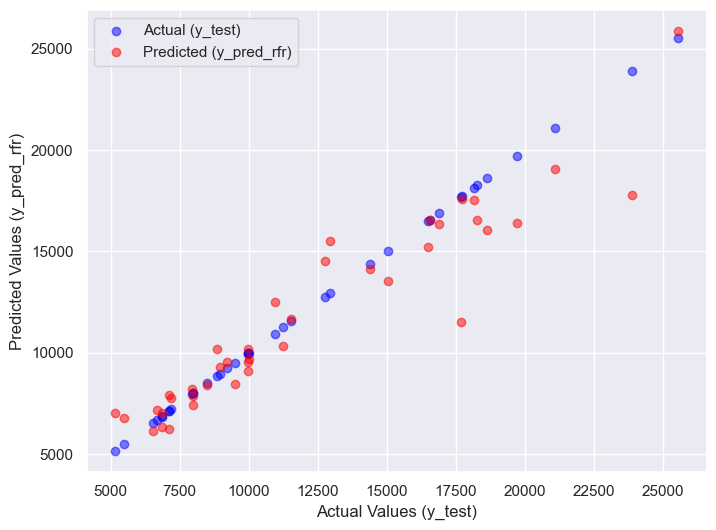

In [375]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_rfr,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_rfr)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_rfr)")
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

### Model Creation

In [390]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_xgb = xgb.fit(x_train,y_train)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [392]:
y_pred_xgb = model_xgb.predict(x_test)

### Model Evaluation

In [395]:
evaluation(y_test,y_pred_xgb)

MSE : 4095886.8072109222
MAE :  1446.2830322265625
R2_Score :  0.8531521543175399


### HyperParameter Tuning

In [398]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(x,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 25.6, 'n_estimators': 115, 'max_depth': 14, 'learning_rate': 0.06, 'gamma': 0.2})


In [399]:
xgb2=XGBRegressor(reg_lambda=51.2,reg_alpha=25.6,n_estimators=115,max_depth=14,learning_rate=0.06,gamma=0.2,random_state=42)
xgb2.fit(x_train,y_train)
y_pred_xgb_2=xgb2.predict(x_test)

### Model Evaluation

In [401]:
evaluation(y_test,y_pred_xgb_2)

MSE : 4839101.63690756
MAE :  1425.9907836914062
R2_Score :  0.8265060330360473


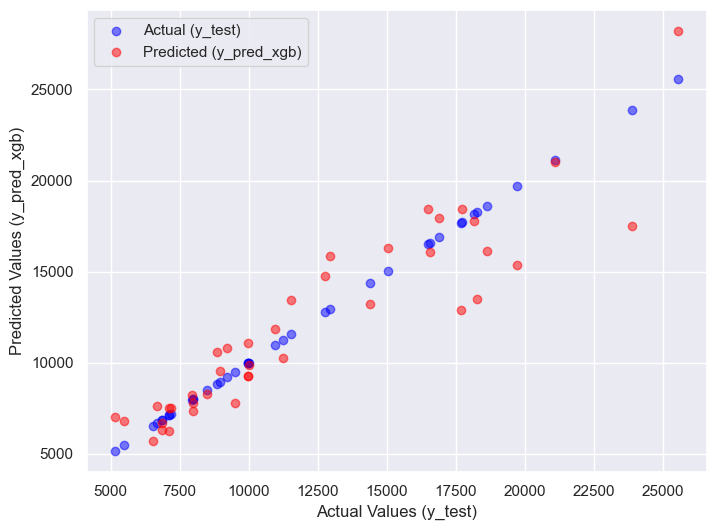

In [402]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_xgb,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_xgb)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_xgb)")
plt.legend()
plt.grid(True)
plt.show()

## Final Report

In [404]:
scores = [0.7086,0.7328,0.5503,0.8309,0.8908,0.8592]
algorithms = ['Linear Regression','KNN','SVR','Decision Tree','Random Forest','XGBoost']

for i in range(len(algorithms)):
    print("R2 Score in " + algorithms[i] + ' algorithm  is ' +' :- '+ f'{scores[i]}')

R2 Score in Linear Regression algorithm  is  :- 0.7086
R2 Score in KNN algorithm  is  :- 0.7328
R2 Score in SVR algorithm  is  :- 0.5503
R2 Score in Decision Tree algorithm  is  :- 0.8309
R2 Score in Random Forest algorithm  is  :- 0.8908
R2 Score in XGBoost algorithm  is  :- 0.8592


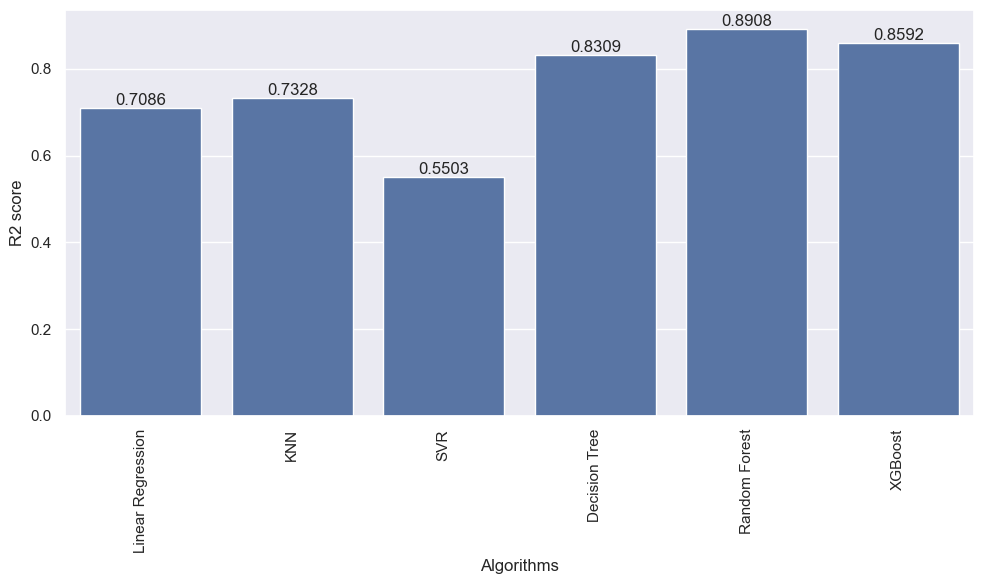

In [425]:
plt.figure(figsize=(10,6))
plt.xlabel('Algorithms')
plt.ylabel('R2 score')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

**"After trying various models, the Random Forest model gives an R2 score of 89.08% , indicating that it is the superior model."**

In [408]:
# Check for overfitting
y_pred_train = model_rfr.predict(x_train)

In [409]:
evaluation(y_train,y_pred_train)

MSE : 648030.5933931076
MAE :  541.2761354166666
R2_Score :  0.9702161441226095


**Conclusion**
- The model provides **data-driven pricing insights** for automobile imports.
- Analysis helps optimize pricing strategies, inventory planning, and market positioning.
- **Random Forest is the recommended model**, achieving **97% accuracy**.
- The results support **better decision-making for automobile pricing and competitiveness**.



# **END OF REPORT**